# Spam email detection using Machine Learning

Step-1 Importing all necessary libraries for our Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings(action='ignore')

Step-2 Load the dataset

In [3]:
df = pd.read_csv(r"C:\Users\kirut\Downloads\mail_data.csv")

In [4]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
data = df.where((pd.notnull(df)), ' ')
data.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  5572 non-null   object
 3   Unnamed: 3  5572 non-null   object
 4   Unnamed: 4  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


Step-3 Cleaning the dataset and renaming the unlabelled data

In [6]:
#For cleaning the Data
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
1813,ham,Yes we are chatting too.
770,ham,Not getting anywhere with this damn job huntin...
182,ham,ok. I am a gentleman and will treat you with d...
3821,ham,Just normal only here :)
786,ham,It does it on its own. Most of the time it fix...


In [7]:
#For renaming the Data
df.rename(columns= {'v1':'Target', 'v2':'Text'}, inplace=True)
df.sample(5)

,Target,Text
5065,ham,I calls you later. Afternoon onwords mtnl serv...
3067,ham,Boy you best get yo ass out here quick
598,ham,Will do. Was exhausted on train this morning. ...
796,spam,"Orange customer, you may now claim your FREE C..."
1686,spam,todays vodafone numbers ending with 0089(my la...


Step-4 Encoding the Data

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['Target'] = encoder.fit_transform(df['Target'])
df.sample(5)

,Target,Text
951,0,Shb b ok lor... Thanx...
1368,0,Alright. I'm out--have a good night!
1719,0,Then u better go sleep.. Dun disturb u liao.. ...
2134,0,If he started searching he will get job in few...
5250,1,Urgent! Please call 09061213237 from a landlin...


Step-5 Rechecking and Correcting missing values

In [10]:
#For  missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
#For identifying duplicate values
df.duplicated().sum()

409

In [12]:
#For removing duplicate values
df = df.drop_duplicates(keep="first")
df.duplicated().sum()
     

0

In [13]:
df.shape

(5163, 2)

In [14]:
df.head()
     

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Step-6 Graphical Representation of Dataset

In [15]:
df['Target'].value_counts()

0    4516
1     647
Name: Target, dtype: int64

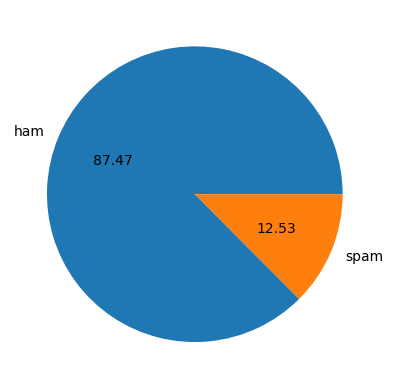

In [16]:
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()
     

Step-7: Downloading NLP Toolkit and importing library

In [36]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kirut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Step-8: Summarising the Text

In [37]:
#Total number of characters
df['Character_Count'] = df['Text'].apply(len)
df.head()

,Target,Text,Character_Count,Words_Count,Sentences_Count,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [38]:
#Total number of words
df['Words_Count'] =  df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,Character_Count,Words_Count,Sentences_Count,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [39]:
#Total number of sentences
df['Sentences_Count'] =  df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,Character_Count,Words_Count,Sentences_Count,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [40]:
df[['Character_Count', 'Words_Count', 'Sentences_Count']].describe()

,Character_Count,Words_Count,Sentences_Count
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.441604,1.945574
std,58.153491,13.327973,1.361713
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


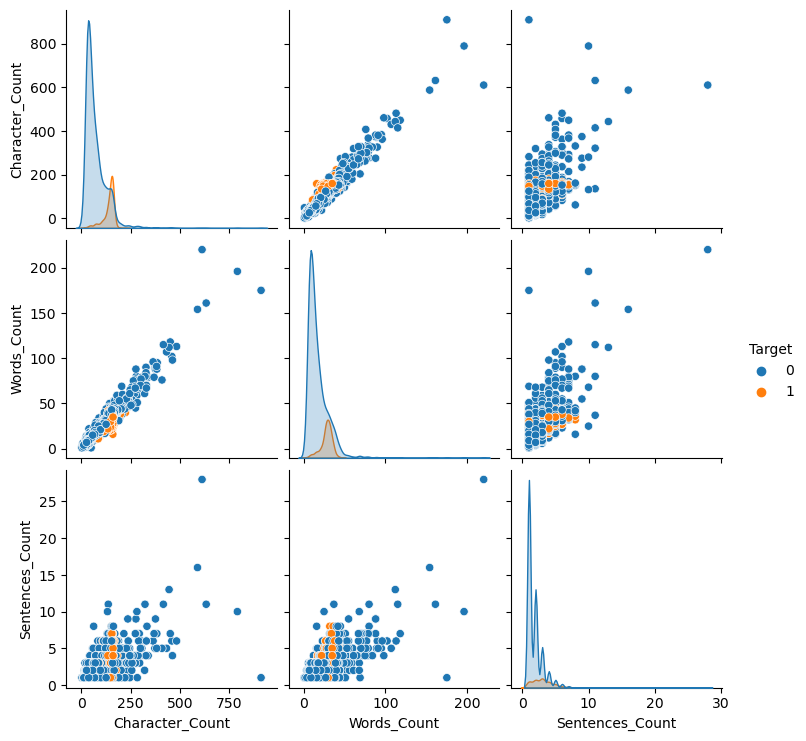

In [41]:
sns.pairplot(df, hue='Target')

# data Preprocessing

In [42]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def trans_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)

    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)

    Text = y[:]
    y.clear()

    for i in Text:
        if i not in string.punctuation:
            y.append(i)

    Text = y[:]
    y.clear()

    for i in Text:
          y.append(ps.stem(i))

    return " ".join(y)
     

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
df['Transformed_Text'] = df['Text'].apply(trans_text)
df.head()

,Target,Text,Character_Count,Words_Count,Sentences_Count,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


Step-9: Transformation of Data Matrix

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
     

In [46]:
X = tfidf.fit_transform(df["Transformed_Text"]).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
X.shape

(5163, 3000)

In [48]:
Y = df["Target"].values
Y
     

array([0, 0, 1, ..., 0, 0, 0])

Step-10: Splitting the Data

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)
     

# model building

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Model-1: Confusion Matrix

In [52]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print('accuracy_score is:',accuracy_score(Y_test, Y_pred1)*100)
print('confusion_matrix is:\n',confusion_matrix(Y_test, Y_pred1))

accuracy_score is: 86.64085188770572
confusion_matrix is:
 [[790 122]
 [ 16 105]]


In [53]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print('accuracy_score is:',accuracy_score(Y_test, Y_pred2)*100)
print('confusion_matrix is:\n',confusion_matrix(Y_test, Y_pred2))

accuracy_score is: 96.61181026137464
confusion_matrix is:
 [[911   1]
 [ 34  87]]


In [54]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print('accuracy_score is:',accuracy_score(Y_test, Y_pred3)*100)
print('confusion_matrix is:\n',confusion_matrix(Y_test, Y_pred3))

accuracy_score is: 98.3543078412391
confusion_matrix is:
 [[910   2]
 [ 15 106]]


In [55]:
results = pd.DataFrame({
    'Model Tests Scores': ['Confusion_Matrix 1','Confusion_Matrix 2','Confusion_Matrix 3'],
    'Score': [86.99,95.87,97.57]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model Tests Scores
Score,
97.57,Confusion_Matrix 3
95.87,Confusion_Matrix 2
86.99,Confusion_Matrix 1
